In [139]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [140]:
# Importing the csv file from pc. 
file_path = 'E:/UNCC/UNCC ML/D3.csv'
sample = pd.DataFrame(pd.read_csv(file_path))
sample.head()

,X1,X2,X3,Y
0,0.000000,3.440000,0.440000,4.387545
1,0.040404,0.134949,0.888485,2.679650
2,0.080808,0.829899,1.336970,2.968490
3,0.121212,1.524848,1.785455,3.254065
4,0.161616,2.219798,2.233939,3.536375


In [141]:
# Creating different array for the four columns
X_0 = sample.values[:,0]
X_1 = sample.values[:,1]
X_2 = sample.values[:,2]
y = sample.values[:,3]
# Printing the first 5 values of the arrays and number of data points
print('X_0 = ', X_0[:5])
print('X_1 = ', X_1[:5])
print('X_2 = ', X_2[:5])
print('y = ', y[:5])
m = len(X_1)
n = len(y)
print('m = ', m)
print('n = ', n)

X_0 =  [0.         0.04040404 0.08080808 0.12121212 0.16161616]
X_1 =  [3.44       0.1349495  0.82989899 1.52484848 2.21979798]
X_2 =  [0.44       0.88848485 1.3369697  1.78545454 2.23393939]
y =  [4.38754501 2.6796499  2.96848981 3.25406475 3.53637472]
m =  100
n =  100


In [142]:
# Assuming a linear equation y = w0x0 + w1x1
# Initiation an array to hold the value of x_0 variable
a_0 = np.ones((m, 1))
a_0[:3]

array([[1.],
       [1.],
       [1.]])

In [143]:
# Initiation arrays to hold the value of x variable from each column
a_x0_1 = X_0.reshape(m,1)
a_x1_1 = X_1.reshape(m,1)
a_x2_1 = X_2.reshape(m,1)

In [144]:
# Creating matrices for each x variable for separate linear regression analysis
a_x0 = np.hstack((a_0, a_x0_1))
a_x1 = np.hstack((a_0, a_x1_1))
a_x2 = np.hstack((a_0, a_x2_1))

print('5 values of x variables for 1st column: \n', a_x0[:5])
print('5 values of x variables for 2nd column: \n', a_x1[:5])
print('5 values of x variables for 3rd column: \n', a_x2[:5])

5 values of x variables for 1st column: 
 [[1.         0.        ]
 [1.         0.04040404]
 [1.         0.08080808]
 [1.         0.12121212]
 [1.         0.16161616]]
5 values of x variables for 2nd column: 
 [[1.         3.44      ]
 [1.         0.1349495 ]
 [1.         0.82989899]
 [1.         1.52484848]
 [1.         2.21979798]]
5 values of x variables for 3rd column: 
 [[1.         0.44      ]
 [1.         0.88848485]
 [1.         1.3369697 ]
 [1.         1.78545454]
 [1.         2.23393939]]


In [145]:
# Setting the values of the coefficient w
w = np.zeros(2)
w

array([0., 0.])

In [146]:
# Creating a function for error calculation
def error_calculation(a, y, w):
    predictions = a.dot(w)
    difference = np.subtract(predictions,y)
    error = 1/(2*m)*np.sum(np.square(difference))
    return error  

In [147]:
# Testing the error for initial values of w
error_x0 = error_calculation(a_x0, y, w) 
error_x1 = error_calculation(a_x1, y, w) 
error_x2 = error_calculation(a_x2, y, w) 
print(f'The error for given \n 1st X_0 values: {error_x0} \n 2nd X_1 values: {error_x1} \n 3rd X_2 values: {error_x2}') 

The error for given 
 1st X_0 values: 5.524438459196242 
 2nd X_1 values: 5.524438459196242 
 3rd X_2 values: 5.524438459196242


In [148]:
# Creating a function to calculate the gradients for a given number of iteration and learning rate
def gradient(a, y, w, alpha, iteration):
    m = len(y)
    error_per_iter = np.zeros(iterations)
    for i in range(iterations):
        predictions = a.dot(w)
        difference = np.subtract(predictions,y)
        grad = (alpha/m)*a.transpose().dot(difference)
        w -= grad
        error_per_iter[i] = error_calculation(a, y, w)
    return w, error_per_iter

In [149]:
# Calculation for the x values of 1st column
iterations = 1500 # Number of iteration 
alpha = 0.01 # Learning rate
theta0, iter_history0 = gradient(a_x0, y, w, alpha, iterations) 
print('Final value of theta 0 =', theta0) 
print('iter_history_0 =', iter_history0) 
print(f'Final error for learning rate 0.01 = {iter_history0[-1]: .3f}') 

Final value of theta 0 = [ 5.71850653 -1.9568206 ]
iter_history_0 = [5.48226715 5.44290965 5.40604087 ... 0.99063932 0.99061433 0.99058944]
Final error for learning rate 0.01 =  0.991


In [150]:
# Calculation for the x values of 2nd column
iterations = 1500 
alpha = 0.01 
theta1, iter_history1 = gradient(a_x1, y, w, alpha, iterations) 
print('Final value of theta 1 =', theta1) 
print('iter_history1 =', iter_history1)
print(f'Final error for learning rate 0.01 = {iter_history1[-1]: .3f}') 

Final value of theta 1 = [0.92183754 0.48530143]
iter_history1 = [7.78019751 7.67266456 7.57620204 ... 3.60380823 3.60378856 3.60376899]
Final error for learning rate 0.01 =  3.604


In [151]:
# Calculation for the x values of 3rd column
iterations = 1500 
alpha = 0.01 
theta2, iter_history2 = gradient(a_x2, y, w, alpha, iterations) 
print('Final value of theta 2 =', theta2) 
print('iter_history 2 =', iter_history2)
print(f'Final error for learning rate 0.01 = {iter_history2[-1]: .3f}') 

Final value of theta 2 = [ 2.80205172 -0.49304729]
iter_history 2 = [4.28817888 4.27128079 4.25606956 ... 3.63008237 3.63007954 3.63007671]
Final error for learning rate 0.01 =  3.630


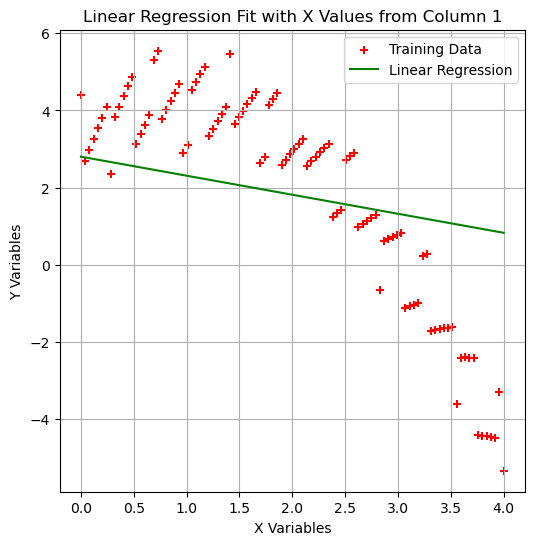

In [152]:
# Plotting the estimated line with the data points in column 1 and y
plt.scatter(a_x0[:, 1], y, color='red', marker='+', label='Training Data') 
# Line plot for the linear regression model 
plt.plot(a_x0[:, 1], a_x0.dot(theta0), color='green', label='Linear Regression')  
plt.rcParams["figure.figsize"] = (6, 4) 
plt.grid(True) 
plt.xlabel('X Variables') 
plt.ylabel('Y Variables') 
plt.title('Linear Regression Fit with X Values from Column 1') 
plt.legend() 
plt.show() 

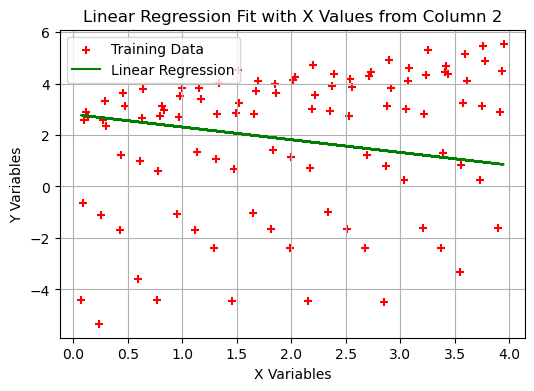

In [153]:
# Plotting the estimated line with the data points in column 2 and y
plt.scatter(a_x1[:, 1], y, color='red', marker='+', label='Training Data') 
# Line plot for the linear regression model 
plt.plot(a_x1[:, 1], a_x1.dot(theta1), color='green', label='Linear Regression') 
plt.rcParams["figure.figsize"] = (6, 4) 
plt.grid(True) 
plt.xlabel('X Variables') 
plt.ylabel('Y Variables') 
plt.title('Linear Regression Fit with X Values from Column 2')
plt.legend() 
plt.show() 

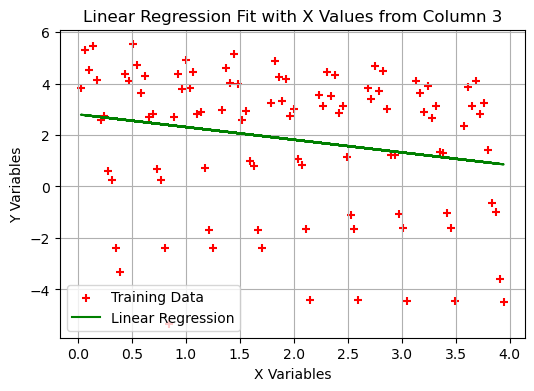

In [154]:
# Plotting the estimated line with the data points in column 3 and y
plt.scatter(a_x2[:, 1], y, color='red', marker='+', label='Training Data') 
# Line plot for the linear regression model 
plt.plot(a_x2[:, 1], a_x2.dot(theta2), color='green', label='Linear Regression') 
plt.rcParams["figure.figsize"] = (6, 4) 
plt.grid(True) 
plt.xlabel('X Variables') 
plt.ylabel('Y Variables') 
plt.title('Linear Regression Fit with X Values from Column 3') 
plt.legend() 
plt.show()

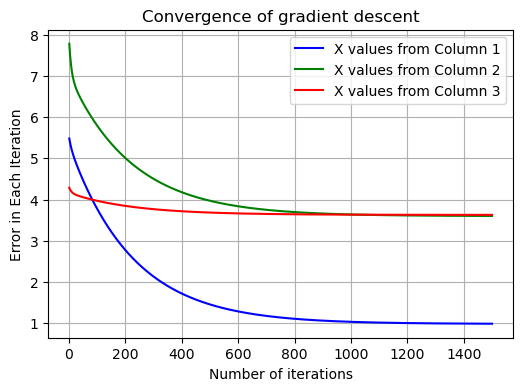

In [155]:
# Plot of error vs iteration for all three values of x
plt.plot(range(1, iterations + 1), iter_history0, color='blue', label='X values from Column 1') 
plt.plot(range(1, iterations + 1), iter_history1, color='green', label='X values from Column 2') 
plt.plot(range(1, iterations + 1), iter_history2, color='red', label='X values from Column 3') 
plt.rcParams["figure.figsize"] = (6, 4) 
plt.grid(True) 
plt.xlabel('Number of iterations') 
plt.ylabel('Error in Each Iteration') 
plt.title('Convergence of gradient descent') 
plt.legend() 
plt.show() 